In [106]:
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from xgboost import XGBClassifier, XGBRegressor
import warnings
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import random
import copy
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from PIL import Image
import joblib

In [69]:
image_size = 60
path = 'datasets/anime_faces/'

n = 0
for image in os.listdir(input_image):
    n += 1

train_images = np.zeros((n, image_size, image_size, 3))

for i, image in enumerate(os.listdir(path)):
    img = Image.open(input_image + image)
    img = img.resize((image_size, image_size))
    train_images[i] = np.array(img)
    train_images[i] = train_images[i] / 255.0


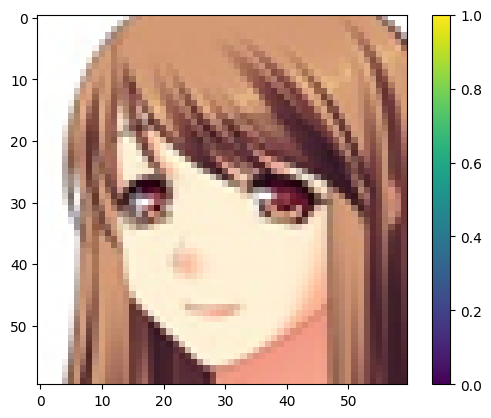

63565


In [105]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.show()
print(n)



In [103]:
latent_dim = 15

rf = RandomForestRegressor(n_estimators=150, max_depth=7, random_state=0, max_samples=0.01, n_jobs=-1)
scaler = MinMaxScaler()
pca = PCA(n_components=latent_dim)
#tsne = TSNE(n_components=2, random_state=42, learning_rate='auto')

y = train_images.reshape(-1, image_size * image_size * 3).copy()
principle_components = pca.fit_transform(y)
X = scaler.fit_transform(principle_components)


print(X.shape, y.shape)

print('fitting')

rf.fit(X, y)

(63565, 15) (63565, 10800)
fitting


RandomForestRegressor(max_depth=7, max_samples=0.01, n_estimators=150,
                      n_jobs=-1, random_state=0)

In [108]:
model_filename = 'anime_face_generation_model.joblib'
joblib.dump(rf, model_filename)

['anime_face_generation_model.joblib']

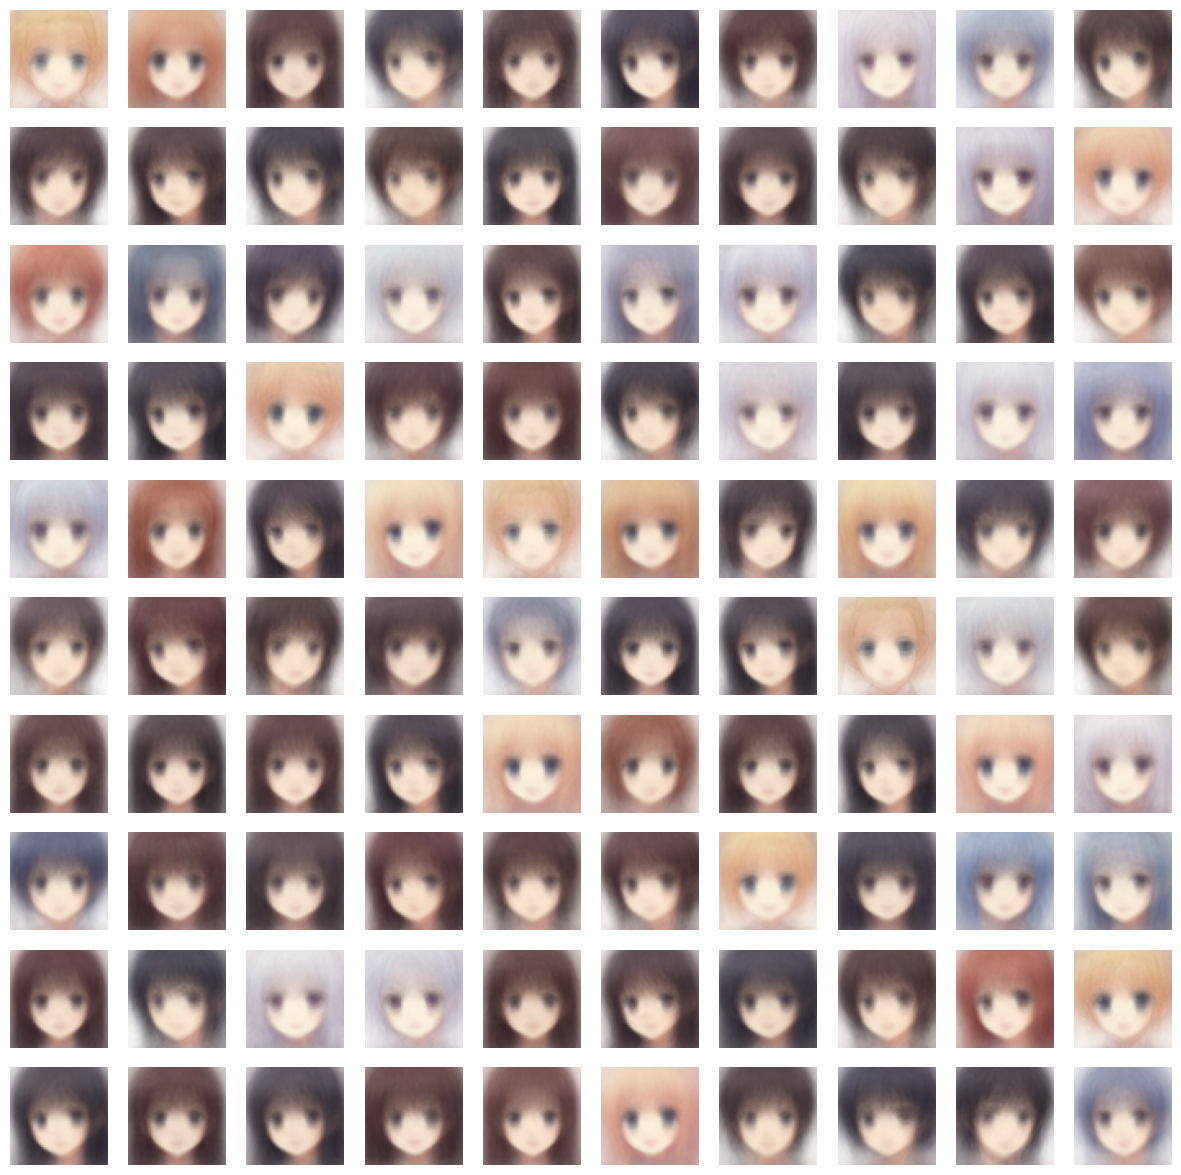

In [104]:
m = 100
threshold = 80
std_dev = 0.5

#input = np.array([[random.uniform(-3, 3) for j in range(latent_dim)] for i in range(m)]).reshape(m, latent_dim)
#cov_matrix = np.identity(latent_dim) * std_dev
#input = np.array([[np.random.multivariate_normal(random.choice(X), cov_matrix)] for i in range(m)]).reshape(m, -1)

input = np.array([[random.uniform(0, 1) for j in range(latent_dim)] for i in range(m)])

y_pred = rf.predict(input)
y_pred = y_pred.reshape(m, image_size, image_size, 3)
#y_pred = np.where(y_pred < threshold, 0, y_pred)

fig, axs = plt.subplots(m//10, 10, figsize=(15, 15))
axs = axs.flatten()
# Plot data on the subplots
for i in range(m):
    axs[i].imshow(y_pred[i])
    axs[i].axis('off')  # Turn off axis labels and ticks


In [35]:
latent_dim = 10

rf = RandomForestRegressor(n_estimators=200, max_depth=6, random_state=0, max_samples=0.1, n_jobs=-1)
pca = PCA(n_components=latent_dim = 2)

sigma = 0.2

y = train_images.reshape(-1, 28*28).copy()
X = train_labels.reshape(-1, 1).copy()
X = X.astype(float)

N = len(X)
X2 = np.zeros((N, latent_dim))

for i in range(N):
    r = [np.random.normal(0, sigma, 1)[0] for j in range(latent_dim)]
    X2[i] = [X[i, 0] + r[j] for j in range(latent_dim)] 

X = X2
print(X.shape, y.shape)
rf.fit(X, y)

(60000, 5) (60000, 784)


RandomForestRegressor(max_depth=6, max_samples=0.1, n_estimators=200, n_jobs=-1,
                      random_state=0)